In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)# Adding nice back ground to the graphs
import scipy.stats       as stats

In [5]:
PartA Answers

SyntaxError: invalid syntax (Temp/ipykernel_13692/560349022.py, line 1)

In [ ]:
#Question 1 Answers
#read csv file
file="PA1.csv"
purchase_list=pd.read_csv(file)

#Qn_1.A "joint probability of the people who planned to purchase and actually placed an order"
Answer_1A=purchase_list['Actually placed order for Product A - Yes'][0]/purchase_list['total'][2]

print(' 1A) joint probability of the people who planned to purchase and actually placed an order %1.4f'% Answer_1A)
#joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase
Answer_1B=purchase_list['Actually placed order for Product A - Yes'][0]/purchase_list['total'][0]
print(' 1B) joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase %1.4f'% Answer_1B)

In [ ]:
#Question 2 Answers
Failure_rate=0.05
Random_sample=10
k   =  np.arange(0,Random_sample+1) # An array of quantiles
binomial = stats.binom.pmf(k,Random_sample,Failure_rate)

print(binomial)

#2.A. Probability that none of the items are defective? 
print(' 2A) Probability that none of the items are defective %1.4f'% binomial[0])

#2.B. Probability that exactly one of the items is defective?
print(' 2B) Probability that exactly one of the items is defective %1.4f'% binomial[1])
#2.C. Probability that two or fewer of the items are defective?
#calculating cumulative binomial cumbinomial = stats.binom.cdf(k,n,p)
cumbinomial = stats.binom.cdf(k,Random_sample,Failure_rate)
print(cumbinomial)
print(' 2C) Probability that two or fewer of the items are defective %1.4f'% cumbinomial[2])
#2.D. Probability that three or more of the items are defective ? 
P = 1- cumbinomial[2]
print(' 2D) Probability that three or more of the items are defective %1.4f'% P)

In [ ]:
#Question 3 Answers
rate=3 #Average sales per week
#3.A.What is Probability that in a given week he will sell some cars
n    =  np.arange(0,16)
cumpoisson = stats.poisson.cdf(n,rate)

P_selling_no_cars=cumpoisson[0]
P_selling_some_cars=1-P_selling_no_cars

print(' 3A) Probability that a given week he will sell some cars %1.4f' % P_selling_some_cars)

#3.B. What is Probability that in a given week he will sell 2 or more but less than 5 cars
# Let P1 be the probability that the agent sells more than 4 cars
P1 = cumpoisson[4] # P(X >=4)
# Let P2 be the probability that the agent sells more than 1  car
P2 = cumpoisson[1] # P(X >=1)
P = P1 - P2 # Prob. that the agent will sell between 2 and 5 cars
print(' 3B) Probability that in a given week he will sell 2 or more but less than 5 cars %1.4f' % P)
# plot poissons distribution plot
poisson = stats.poisson.cdf(n,rate)
plt.plot(n,poisson, 'o-')
plt.title('Poisson')
plt.xlabel('Number of cars sold per week')
plt.ylabel('Cumulative Prob of cars sold per week')
plt.show()


In [ ]:
#Question 4 Answers

Accuracy_rate=0.868
Random_sample=3
k   =  np.arange(0,Random_sample+1) # An array of quantiles
binomial = stats.binom.pmf(k,Random_sample,Accuracy_rate)
print(binomial)

#4.A. What is the probability that all three orders will be recognised correctly?

print(' 4A) probability that all three orders will be recognised correctly %1.4f'% binomial[3])

#4.B. What is the probability that none of the three orders will be recognised correctly
print(' 4B) probability that none of the three orders will be recognised correctly %1.4f'% binomial[0])

#4.C. What is the probability that at least two of the three orders will be recognised correctly?
binomial=binomial[2]+binomial[3]
print(' 4C) probability that at least two of the three orders will be recognised correctly %1.4f'% binomial)

#Question 5 Answers
Explain 1 real life industry scenario (other than the ones mentioned above) where you can use the concepts learnt in this module of
Applied Statistics to get data driven business solution

***********************
1.Manufacturing industry: Probability of finding out faulty product out of a production batch
2.Customer service industry: Probability of finding out number of customers to attend in a busy hour
3.Human Resource: Nomalise employee ratings in an organisation
4.Telecom Industry: Probablity of a phone call dropping in busy hours of the day

In [ ]:
PartB Answers

In [ ]:
#cleaning the data and prepare final dataset to be used for analysis.

# Reading Raw data set
file="DS+-+Part2+-+Basketball.csv"
df=pd.read_csv(file)
print(df)




In [ ]:
# Replace the '-' with 0
df = df.replace('-',0)
# replace the matching strings 
df = df.replace(to_replace ='to', value = '-', regex = True) 
df = df.replace(to_replace ='_', value = '-', regex = True) 
df = df.replace(to_replace ='~', value = '-', regex = True) 

In [ ]:
# Print the updated dataframe 
df.head(10)
# display attribute datatypes
df.dtypes

# Observation: majority of the attributes are of type "object"

In [ ]:
# display attribute information
df.info()
# Observation: There are no null values present in the dataset


In [ ]:
# Convert the attributes with type "OBJECT" to "INT"
import re  # importing regular expressions library

# Extract debut year
for i in range(len(df['TeamLaunch'])):
    x=df.loc[i,"TeamLaunch"]
    temp = re.findall(r'\d\d\d\d',x)
    df.loc[i,"TeamLaunch"]=temp
# type conversion
df["TeamLaunch"]=df["TeamLaunch"].astype('int')

# Create a new dataframe
df_new = df.loc[:,df.columns != 'Team']
df_new=df_new.astype('int')
df_new['Team']=df['Team']

# display the data types of the new dataframe
df_new.info()


#Printing cleaned data set
print(df_new)

In [ ]:
#Perform detailed statistical analysis and EDA using univariate, bi-variate and multivariate EDA techniques to get data driven insights on
#recommending which teams they can approach which will be a deal win for them. Also as a data and statistics expert you have to develop a
#detailed performance report using this data'


# Age of each team - Assumption the data is from the year 2019

df_new['Age']=2019-df_new['TeamLaunch']
df_new['Age']
print(df_new)


In [ ]:
# Creating new features: Win Rate

df_new['WinRate']=df_new['WonGames']/df_new['PlayedGames']
df_new['WinRate'].head()

df_new.head()

In [ ]:
df_1=df_new.filter(['Team','Age','WinRate','ChampRate'])
df_1.head()

In [ ]:
df_1.sort_values(by='Age').head(10) # Youngest teams

In [ ]:
df_1.sort_values(by='Age',ascending=False).head(10) # Oldest teams

In [ ]:
df_1.sort_values(by='WinRate',ascending=False).head(10) # Top performing teams

In [ ]:
df_1.sort_values(by='WinRate',ascending=True).head(10) # Low performing teams

In [ ]:
df_2=df_1.sort_values(by='WinRate',ascending=False) # Top performing teams
df_2.sort_values(by='Age',ascending=True).head(10) # Top performing young teams

In [ ]:
# Plotting new features


import plotly.express as px
fig = px.scatter(df_new, x="Team", y="WinRate",color='Team')
fig.show()

In [ ]:
# Young vs old team's performance

fig = px.scatter(df_new, x="WinRate", y="HighestPositionHeld",size="Age",color='Team')
fig.show()

In [ ]:
# Young vs old team's performance

fig = px.scatter(df_new, x="Team", y="WinRate",size="Age")
fig.show()

Observations:

Young and old teams with similar performance

Team 6:
Win Rate: 41%
Highest Position: 1
Age: 85
Team 21:
Win Rate: 41%
Highest Position: 2
Age: 21
Young teams with similar performance

- Team 57:
    1. Win Rate: 21%%
    2. Highest Position: 20
    3. Age: 10
- Team 56:
    1. Win Rate: 21%
    2. Highest Position: 17
    3. Age: 3
There are many columns available with many combinations.

In [ ]:
import plotly.express as px
fig = px.box(df_new,y='Age')  # Mix match columns and comment on the statistical distribution
fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(df_new, x="Age")  # Mix match columns and comment on the statistical distribution
fig.show()

In [ ]:
import plotly.express as px
fig = px.pie(df_new, values='Age', names='Team') # Mix match columns and comment on functional findings
fig.show()

Observation:
Majority of the teams are from age 40 to 85

Perform detailed statistical analysis on all the possible columns

In [ ]:
df_new.describe().T

In [ ]:
import plotly.express as px
fig = px.histogram(df_new, x="HighestPositionHeld")  # Mix match columns and comment on the statistical distribution
fig.show()

In [ ]:
import plotly.express as px
fig = px.box(df_new,y='HighestPositionHeld')  # Mix match columns and comment on the statistical distribution
fig.show()

Example insights:
Best Position: 1 to 6 has more representation then the rest which goes till 20.

In [ ]:
df_new.corr()

In [ ]:
import plotly.express as px
fig = px.box(df_new,y='Score')  # Mix match columns and comment on the statistical distribution
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter(df_new, x="PlayedGames", y="WonGames",color='Team')
fig.show()

Example insights:
Linear relationship found.
Exact correlation can be found using a corr() plot

In [ ]:
import plotly.express as px
fig = px.pie(df_new, values='PlayedGames', names='Team') # Mix match columns and comment on functional findings
fig.show()

Example insights:
self explainatory graph

In [ ]:
import plotly.express as px
fig = px.scatter_matrix(df_new,dimensions=["PlayedGames", "WonGames", "LostGames"],color="Team")
fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(df_new, x="Age")  # Mix match columns and comment on the statistical distribution
fig.show()

Recommendation:
Company’s management wants to invest on proposal on managing some of the best teams in the league. The analytics department has been assigned with a task of creating a report on the performance shown by the teams. Some of the older teams are already in contract with competitors. Hence Company X wants to understand which teams they can approach which will be a deal win for them.

Answer:
Top 5 teams that are common between below Table 1 & Table2 should be recommended to approach.

In [6]:
# Table 1
df_2=df_1.sort_values(by='WinRate',ascending=False) # Top performing teams
df_2.sort_values(by='Age',ascending=True).head(10) # Top performing old teams

NameError: name 'df_1' is not defined

In [ ]:
# # Table 2
df_2=df_1.sort_values(by='ChampRate',ascending=False) # Top performing teams
df_2.sort_values(by='Age',ascending=True).head(10) # Top performing old teams

In [ ]:
df_new.shape

####> QUESTION 3:

Above data analysis was focused aroung Team name, Age, Winning Rate. A combination of 3 columns.

Likewise there are 16 columns. There could be hundreds of combinations possible.

Use your best analytical skills to perform data analysis to adhere to " performance of the team "

There are many libraries which enable you to create interractive graphs.

#PartC Answers

In [9]:
# Reading Raw data set
file="DS+-+Part3+-+CompanyX_EU.csv"
df=pd.read_csv(file)
print(df)

             Startup             Product Funding             Event  \
0             2600Hz          2600hz.com     NaN   Disrupt SF 2013   
1               3DLT            3dlt.com   $630K  Disrupt NYC 2013   
2        3DPrinterOS     3dprinteros.com     NaN   Disrupt SF 2016   
3         3Dprintler      3dprintler.com     $1M   Disrupt NY 2016   
4    42 Technologies  42technologies.com     NaN  Disrupt NYC 2013   
..               ...                 ...     ...               ...   
657           Zivity          zivity.com     $8M         TC40 2007   
658           Zmorph        zmorph3d.com     $1M                 -   
659           Zocdoc          zocdoc.com   $223M         TC40 2007   
660             Zula         zulaapp.com   $3.4M   Disrupt SF 2013   
661           Zumper          zumper.com  $31.5M   Disrupt SF 2012   

              Result OperatingState  
0         Contestant      Operating  
1         Contestant         Closed  
2         Contestant      Operating  
3    Au

In [10]:

#Check the datatypes of each attribute.
datatypes = df.dtypes
print(datatypes)

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object


In [11]:
#Check for null values in the attributes
pd.isnull(df)

,Startup,Product,Funding,Event,Result,OperatingState
0,False,False,True,False,False,False
1,False,False,False,False,False,False
2,False,False,True,False,False,False
3,False,False,False,False,False,False
4,False,False,True,False,False,False
...,...,...,...,...,...,...
657,False,False,False,False,False,False
658,False,False,False,False,False,False
659,False,False,False,False,False,False
660,False,False,False,False,False,False


data preprocessing & visualisation

In [12]:
# Drop the null values. 
df1 = df.dropna().copy(deep=True)   # drop the rows which have no data for funds raised

In [14]:
# Convert ‘Funds Raised’ features to a numerical value
df1['Funding'].sample(5)

393    $38.5M
413      $50K
293     $1.8M
455      $20K
439     $150K
Name: Funding, dtype: object

In [16]:
# Run this cell - Don't change anything
df1.loc[:,'Funds_in_million'] = df1['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))

8.72975
22.569625
6        29.0
31       24.0
40       50.9
49       40.0
56      205.0
108      32.5
113     182.1
128      35.4
130      38.0
132      37.1
138      72.0
139      64.0
154    1700.0
166      34.6
172      35.5
179      30.1
180      26.0
188      66.0
191      28.3
209     103.0
213      25.9
215      36.5
225      44.7
231      24.2
271     122.4
276      34.9
279      67.8
282     166.1
302      42.1
305      69.0
313      65.1
325      25.1
346      31.8
389      37.0
393      38.5
394      25.5
398      24.0
427     278.0
432      24.0
435      63.0
460      25.0
471     160.0
546      40.0
555      47.4
560      24.5
581      25.0
593     332.4
598      35.0
606     168.8
615      28.0
625      30.8
643      41.8
644     142.0
647     117.8
649      26.0
650      28.0
654      62.1
656     583.6
659     223.0
661      31.5
Name: Funds_in_million, dtype: float64
 number of outliers greater than the upper fence 60
3        1.00
6       29.00
10       1.80
13       

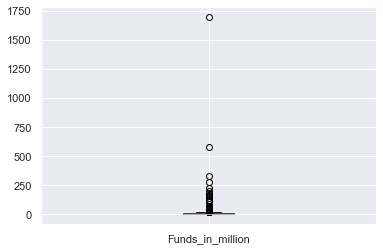

In [21]:







#plot box plots for funds in million
boxplot = df1.boxplot(column=['Funds_in_million']);

#Check the number of outliers greater than the upper fence.
q3, q1 = np.percentile(df1['Funds_in_million'], [75 ,25])
iqr = q3 - q1
print(iqr);
Upper_Fence=q3+1.5*iqr
print(Upper_Fence);
df2=df1['Funds_in_million'][df1['Funds_in_million']>Upper_Fence]
print(df2)
count=df2.count()
print(' number of outliers greater than the upper fence %d'% count)

#Check frequency of the OperatingState features classes
df1.OperatingState.value_counts()
#Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?
df3=df1['Funds_in_million'][df1['OperatingState']=='Operating']
print(df3)
df4=df1['Funds_in_million'][df1['OperatingState']=='Closed']
print(df4)
Operating_sum=sum(df3)
print(Operating_sum)
Closed_sum=sum(df4)
print(Closed_sum)
Difference=Operating_sum-Closed_sum
print(' difference between Funds raised by companies that are still operating vs companies that closed down are millions of %1.4f'% Difference)

#Write the null hypothesis and alternative hypothesis

from statsmodels.stats.weightstats import ztest

sample1 = df1.loc[df1.OperatingState == 'Operating', 'Funds_in_million']
sample2 = df1.loc[df1.OperatingState =='Closed', 'Funds_in_million']

alpha = 0.05   # Let's consider a significance level of 5%

test_statistic, p_value = ztest(sample1, sample2)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')
#Test for significance and conclusion
from scipy.stats import ttest_ind

test_statistic, p_value = ttest_ind(sample1, sample2)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')
# Make a copy of the original data frame.
df_Copy = df.copy()
print(df_Copy)

#Check frequency distribution of Result variables.
# Make a copy of the original data
df2 = df.copy(deep = True)
df2.head()
# Frequency distribution of Result Variable

df2.Result.value_counts()
#Calculate percentage of winners that are still operating and percentage of contestants that are still operating 
# Calculate percentage of winners
winners = df2.Result.value_counts()[1:].sum()
contestants = df2.Result.value_counts()['Contestant']

contestants_operating = df2.OperatingState[df2.Result == 'Contestant'].value_counts().loc['Operating']
winners_operating = df2.OperatingState[df2.Result != 'Contestant'].value_counts().loc['Operating']

winners_operating/winners, contestants_operating/contestants



#Test for significance and conclusion 
#Select only the Event that has ‘disrupt’ keyword from 2013 onwards.


Null hyputhesis (Ho): The proportion of companies that are operating is the same in both categories - winners and contestants

Alternative hypothesis (Ha): The proportion of companies that are operating is significantly different from each other, among the two categories

In [22]:
from statsmodels.stats.proportion import proportions_ztest

test_statistic, p_value = proportions_ztest([contestants_operating, winners_operating], [contestants, winners])

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

Since the p-value, 0.037 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


Conclusion

The amount of funds a company raises is not a significant factor in deciding if the company will remain operational or close down
Winners in the battle have proven to remain operational more so, than the companies that came out only as contestants

In [23]:
# Events with disrupt keyword
df1[df1.Event.apply(lambda x: 'Disrupt' in x)].Event.value_counts()

Disrupt SF 2011         24
Disrupt NYC 2013        22
Disrupt SF 2013         22
Disrupt NY 2015         21
Disrupt NYC 2012        21
Disrupt SF 2012         20
Disrupt NYC 2011        19
Disrupt SF 2010         19
Disrupt SF 2014         19
Disrupt SF 2015         19
Disrupt SF 2016         17
Disrupt NYC 2014        16
Disrupt NY 2016         16
Disrupt NYC 2010        15
Disrupt London 2015     12
Disrupt London 2016     10
Disrupt EU 2014         10
Disrupt EU 2013          9
Disrupt Beijing 2011     7
Name: Event, dtype: int64